In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Reading in .csv file
byrd = pd.read_csv('Byrd2.csv')
# byrd.head()

In [3]:
#Rename columns to associate with data type 
byrd = byrd.rename(columns={'Unnamed: 0':'month','Mean':'mean temp', '% of': '% temp missing', 'Unnamed: 3': 'max air temp', 
                             'Unnamed: 4': 'min air temp', 'Mean.1': 'mean wind speed (m/s)', '% of.1': '% wind missing', 'Unnamed: 7': 
                             'result wind direction', 'Unnamed: 8': 'result wind vv', 'Unnamed: 9': 'Con', 'Unnamed: 10': 'max wind direction',
                            'Unnamed: 11': 'max wind vv', 'Mean.2': 'mean air pressure (mb)', '% of.2': '% pressure missing', 'Unnamed: 14':
                            'max air pressure', 'Unnamed: 15': 'min air pressure', 'Unnamed: 16': 'theta (K)'})
#Drop unnamed columns at the end with no data
byrd = byrd.drop(columns = {'Unnamed: 17', 'Unnamed: 18'})
byrd

month mean temp % temp missing max air temp min air temp  \
0            NaN       Air            Mon      Max Air      Min Air   
1            NaN      Temp           Data         Temp         Temp   
2          Month       (C)            Abs          (C)          (C)   
3            NaN       NaN            NaN          NaN          NaN   
4    Byrd (8903)       NaN            NaN       80.00S          NaN   
..           ...       ...            ...          ...          ...   
667          Sep       NaN            NaN          NaN          NaN   
668          Oct       NaN            NaN          NaN          NaN   
669          Nov       NaN            NaN          NaN          NaN   
670          Dec       NaN            NaN          NaN          NaN   
671         MEAN     -27.0            NaN          NaN          NaN   

    mean wind speed (m/s) % wind missing result wind direction result wind vv  \
0                    Wind            Mon                   NaN            NaN   
1                   Speed           Data                Result            NaN   
2                   (m/s)            Abs             Wind (dir            vv)   
3                     NaN            NaN                   NaN            NaN   
4                     NaN            NaN               120.00W            NaN   
..                    ...            ...                   ...            ...   
667                   NaN            NaN                   NaN            NaN   
668                   NaN            NaN                   NaN            NaN   
669                   NaN            NaN                   NaN            NaN   
670                   NaN            NaN                   NaN            NaN   
671                   9.3            NaN                   NaN            NaN   

     Con max wind direction max wind vv mean air pressure (mb)  \
0    NaN                Max         NaN                    Air   
1    NaN               Wind         NaN                  Press   
2    Con               (dir         vv)                   (mb)   
3    NaN                NaN         NaN                    NaN   
4    NaN                NaN      1530 M                    NaN   
..   ...                ...         ...                    ...   
667  NaN                NaN         NaN                    NaN   
668  NaN                NaN         NaN                    NaN   
669  NaN                NaN         NaN                    NaN   
670  NaN                NaN         NaN                    NaN   
671  NaN                NaN         NaN                  803.3   

    % pressure missing max air pressure min air pressure  theta (K)  
0                  Mon          Max Air          Min Air  Potential  
1                 Data            Press            Press       Temp  
2                  Abs             (mb)             (mb)        (K)  
3                  NaN              NaN              NaN        NaN  
4                 1980              NaN              NaN        NaN  
..                 ...              ...              ...        ...  
667                NaN              NaN              NaN        NaN  
668                NaN              NaN              NaN        NaN  
669                NaN              NaN              NaN        NaN  
670                NaN              NaN              NaN        NaN  
671                NaN              NaN              NaN        NaN  

[672 rows x 17 columns]

In [4]:
#Drop the top four indecies now that everything is named
byrd = byrd.drop(index = [0, 1, 2, 3])

In [5]:
#Set the datatype as a string for the month column as it is in string format
byrd['month'] = byrd['month'].astype('string')

In [6]:
#Drop the rows in the column month that start with the following:
byrd = byrd.loc[(byrd['month'] != 'MEAN') & (byrd['month'] != 'NaN') & (byrd['month'] != 'Month')]

In [7]:
#Reset the indecies
byrd.reset_index(inplace=True, drop=True)
byrd

month mean temp % temp missing max air temp min air temp  \
0    Byrd (8903)       NaN            NaN       80.00S          NaN   
1            Feb     -15.8             17         -8.2        -25.7   
2            Mar     -24.8             00         -7.5        -45.1   
3            Apr     -21.9             00         -7.6        -40.3   
4            May     -26.0             00        -11.8        -52.4   
..           ...       ...            ...          ...          ...   
490          Aug     -32.1             00        -18.5        -48.1   
491          Sep       NaN            NaN          NaN          NaN   
492          Oct       NaN            NaN          NaN          NaN   
493          Nov       NaN            NaN          NaN          NaN   
494          Dec       NaN            NaN          NaN          NaN   

    mean wind speed (m/s) % wind missing result wind direction result wind vv  \
0                     NaN            NaN               120.00W            NaN   
1                     6.6             17                   355            5.9   
2                     5.6             00                   349            4.6   
3                     6.0             00                   344            5.2   
4                     6.5             00                   356            6.4   
..                    ...            ...                   ...            ...   
490                  11.5            3.6                    29           10.7   
491                   NaN            NaN                   NaN            NaN   
492                   NaN            NaN                   NaN            NaN   
493                   NaN            NaN                   NaN            NaN   
494                   NaN            NaN                   NaN            NaN   

      Con max wind direction max wind vv mean air pressure (mb)  \
0     NaN                NaN      1530 M                    NaN   
1    0.89                353          15                  823.0   
2    0.81                006          18                  813.1   
3    0.88                354          17                  818.8   
4    0.98                360          21                  817.2   
..    ...                ...         ...                    ...   
490  0.94                 51          32                  796.1   
491   NaN                NaN         NaN                    NaN   
492   NaN                NaN         NaN                    NaN   
493   NaN                NaN         NaN                    NaN   
494   NaN                NaN         NaN                    NaN   

    % pressure missing max air pressure min air pressure theta (K)  
0                 1980              NaN              NaN       NaN  
1                   17            834.0            811.4       NaN  
2                   00            826.8            797.3       NaN  
3                   00            836.1            802.3       NaN  
4                   00            840.1            802.5       NaN  
..                 ...              ...              ...       ...  
490                 00            814.2            778.1     257.3  
491                NaN              NaN              NaN       NaN  
492                NaN              NaN              NaN       NaN  
493                NaN              NaN              NaN       NaN  
494                NaN              NaN              NaN       NaN  

[495 rows x 17 columns]

In [8]:
#Change the type of the column to numerics
byrd['% pressure missing'] = pd.to_numeric(byrd['% pressure missing'], errors = 'coerce')

In [9]:
#Create a new column in our dataframe for the year values
byrd['year'] = ''

In [10]:
#Create starting point for the years we are searching for
start = byrd['% pressure missing'].loc[byrd['% pressure missing'] >= 1000]

first_year = start[0]
current_year = first_year

start_index = byrd['% pressure missing'].loc[byrd['% pressure missing'] == first_year].index[0]
end_index = 99999

#Create for loop which will look for the years within the dataset column and assign values to the year column in the appropraite indecies 
for val in (byrd['% pressure missing']): 

    if ((val == current_year) | (val < 1000) | (str(val) == 'nan')):
        continue
    else:
        end_index = byrd['% pressure missing'].loc[byrd['% pressure missing'] == val].index[0]-1
        byrd.loc[start_index : end_index, 'year'] = current_year
        start_index = end_index+1
        current_year = val
        if (val == 2022): 
            byrd.loc[end_index+2:, 'year'] = current_year

#Change the data in the years column to numerics 
byrd['year'] = pd.to_numeric(byrd['year'], errors = 'coerce')
#Change values of mean temperature to float
byrd['mean temp'] = byrd['mean temp'].astype('float')

In [11]:
byrd = byrd.loc[byrd['month'] != 'Byrd (8903)']
byrd = byrd.loc[byrd['month'] != 'Mean']
byrd = byrd.loc[byrd['month'] != 'Byrd (08903)']
byrd

month  mean temp % temp missing max air temp min air temp  \
1     Feb      -15.8             17         -8.2        -25.7   
2     Mar      -24.8             00         -7.5        -45.1   
3     Apr      -21.9             00         -7.6        -40.3   
4     May      -26.0             00        -11.8        -52.4   
5     Jun      -35.1             04        -12.8        -55.1   
..    ...        ...            ...          ...          ...   
490   Aug      -32.1             00        -18.5        -48.1   
491   Sep        NaN            NaN          NaN          NaN   
492   Oct        NaN            NaN          NaN          NaN   
493   Nov        NaN            NaN          NaN          NaN   
494   Dec        NaN            NaN          NaN          NaN   

    mean wind speed (m/s) % wind missing result wind direction result wind vv  \
1                     6.6             17                   355            5.9   
2                     5.6             00                   349            4.6   
3                     6.0             00                   344            5.2   
4                     6.5             00                   356            6.4   
5                     6.9             04                   359            6.4   
..                    ...            ...                   ...            ...   
490                  11.5            3.6                    29           10.7   
491                   NaN            NaN                   NaN            NaN   
492                   NaN            NaN                   NaN            NaN   
493                   NaN            NaN                   NaN            NaN   
494                   NaN            NaN                   NaN            NaN   

      Con max wind direction max wind vv mean air pressure (mb)  \
1    0.89                353          15                  823.0   
2    0.81                006          18                  813.1   
3    0.88                354          17                  818.8   
4    0.98                360          21                  817.2   
5    0.93                003          20                  803.0   
..    ...                ...         ...                    ...   
490  0.94                 51          32                  796.1   
491   NaN                NaN         NaN                    NaN   
492   NaN                NaN         NaN                    NaN   
493   NaN                NaN         NaN                    NaN   
494   NaN                NaN         NaN                    NaN   

     % pressure missing max air pressure min air pressure theta (K)    year  
1                  17.0            834.0            811.4       NaN  1980.0  
2                   0.0            826.8            797.3       NaN  1980.0  
3                   0.0            836.1            802.3       NaN  1980.0  
4                   0.0            840.1            802.5       NaN  1980.0  
5                   4.0            826.4            785.5       NaN  1980.0  
..                  ...              ...              ...       ...     ...  
490                 0.0            814.2            778.1     257.3  2022.0  
491                 NaN              NaN              NaN       NaN  2022.0  
492                 NaN              NaN              NaN       NaN  2022.0  
493                 NaN              NaN              NaN       NaN  2022.0  
494                 NaN              NaN              NaN       NaN  2022.0  

[453 rows x 18 columns]

In [12]:
#Make the numberic type for years into an integer 
byrd['year'] = byrd['year'].astype('int')

In [13]:
#Use the months and years to make a datetime column and add it to the dataset
dates = pd.to_datetime(byrd['month'].astype('str') + byrd['year'].astype('str'), format='%b%Y')
byrd['datetime'] = dates.dt.date

#Set datettime as an index
byrd = byrd.set_index(byrd['datetime'])

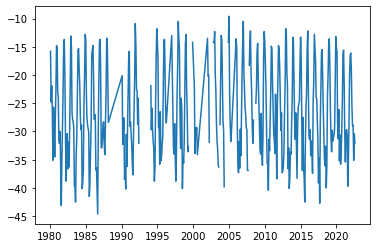

In [14]:
#Show you can plot the whole history of mean temperature 
plt.plot(byrd['datetime'], byrd['mean temp'])

<AxesSubplot:xlabel='datetime'>

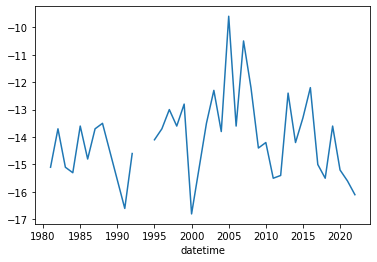

In [15]:
# Show you can plot individual months 
jan = byrd.loc[byrd['month'] == 'Jan']
jan['mean temp'].plot()

In [16]:
feb = byrd.loc[byrd['month'] == 'Feb']
march = byrd.loc[byrd['month'] == 'Mar']
april = byrd.loc[byrd['month'] == 'Apr']
may = byrd.loc[byrd['month'] == 'May']
june = byrd.loc[byrd['month'] == 'Jun']
jul = byrd.loc[byrd['month'] == 'Jul']
aug = byrd.loc[byrd['month'] == 'Aug']
sep = byrd.loc[byrd['month'] == 'Sep']
octb = byrd.loc[byrd['month'] == 'Oct']
nov = byrd.loc[byrd['month'] == 'Nov']
dec = byrd.loc[byrd['month'] == 'Dec']

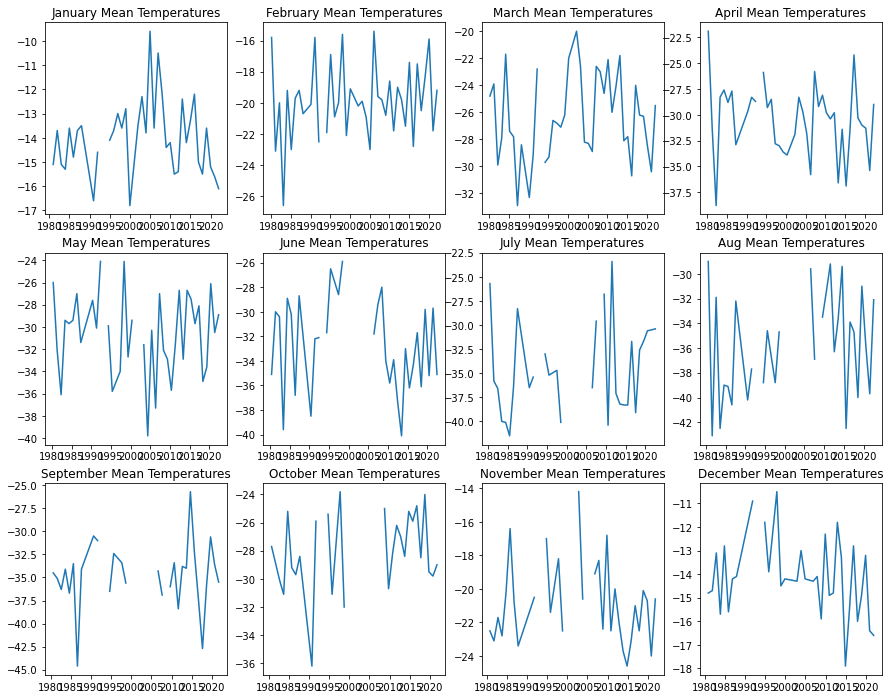

In [17]:
#Make subplots of all the monthly mean temperature data 
fig, ax = plt.subplots(3, 4, figsize = (15,12))
axs = ax.flatten()

ax[0,0].plot(jan['mean temp'])
ax[0,0].set_title('January Mean Temperatures')

ax[0,1].plot(feb['mean temp'])
ax[0,1].set_title('February Mean Temperatures')

ax[0,2].plot(march['mean temp'])
ax[0,2].set_title('March Mean Temperatures')

ax[0,3].plot(april['mean temp'])
ax[0,3].set_title('April Mean Temperatures')

ax[1,0].plot(may['mean temp'])
ax[1,0].set_title('May Mean Temperatures')

ax[1,1].plot(june['mean temp'])
ax[1,1].set_title('June Mean Temperatures')

ax[1,2].plot(jul['mean temp'])
ax[1,2].set_title('July Mean Temperatures')

ax[1,3].plot(aug['mean temp'])
ax[1,3].set_title('Aug Mean Temperatures')

ax[2,0].plot(sep['mean temp'])
ax[2,0].set_title('September Mean Temperatures')

ax[2,1].plot(octb['mean temp'])
ax[2,1].set_title('October Mean Temperatures')

ax[2,2].plot(nov['mean temp'])
ax[2,2].set_title('November Mean Temperatures')

ax[2,3].plot(dec['mean temp'])
ax[2,3].set_title('December Mean Temperatures')

plt.show()

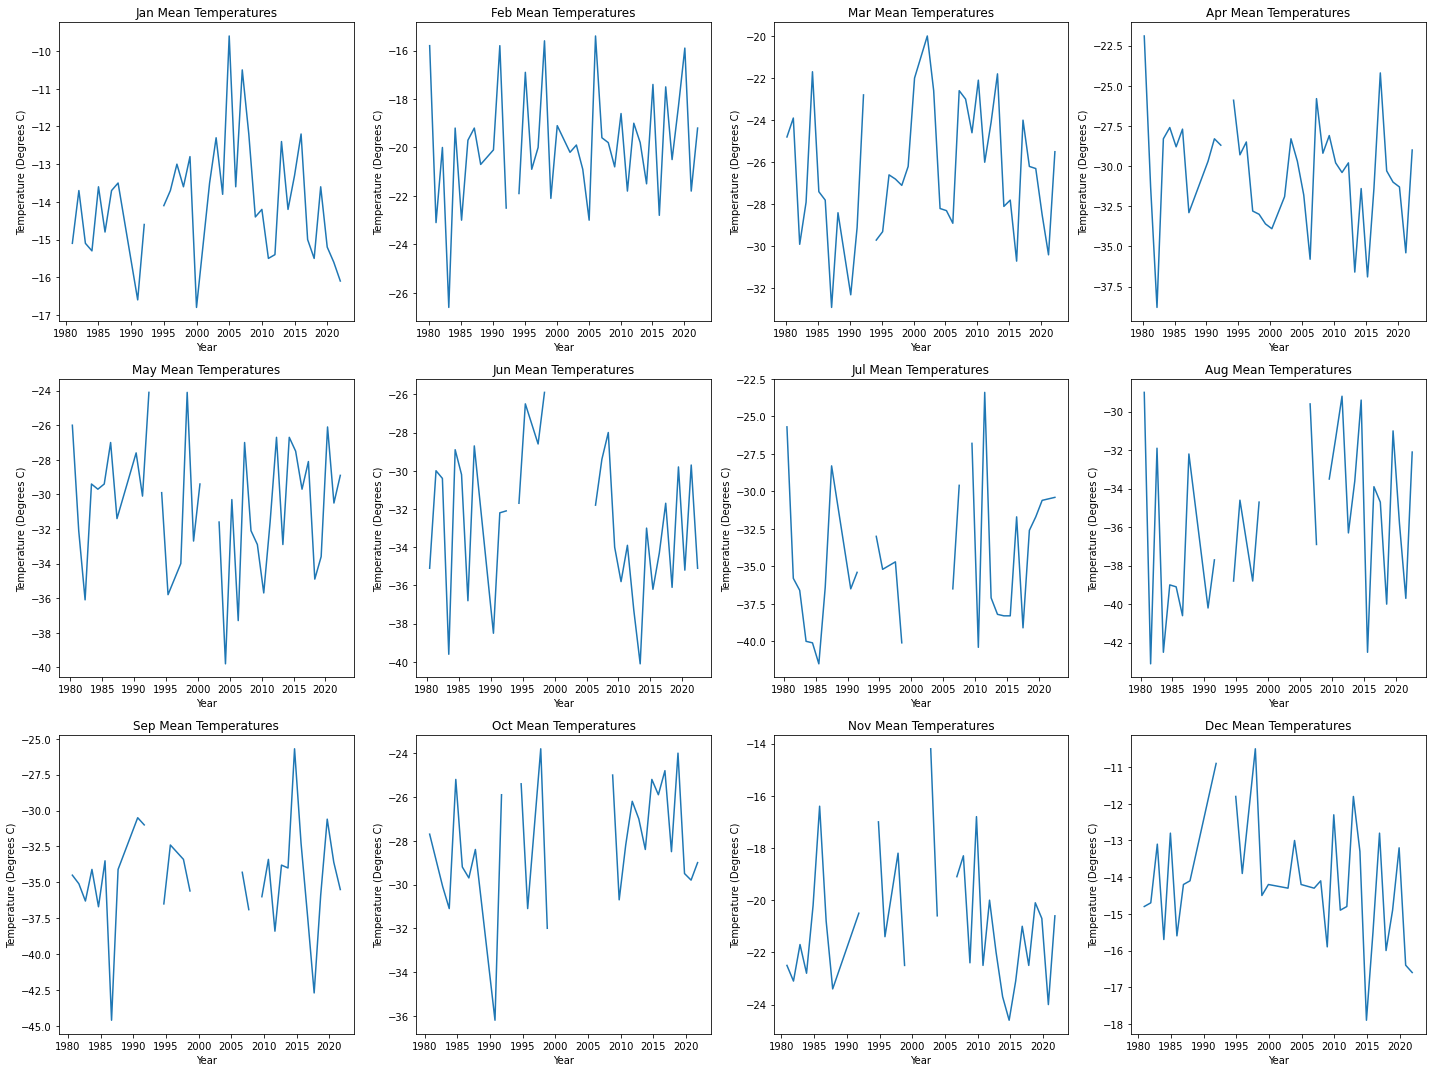

In [63]:
#Create a for loop that will perform the above expanded graphing procedure 
fig, ax1 = plt.subplots(3, 4, figsize = (20,15))
axs = ax1.flatten()
fig.set_facecolor('white')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = 0
y = 0

for month in months:
    temp_mean = byrd.loc[byrd['month'] == month]
    # wtf.reset_index(inplace = True, drop = True)
    # wtf['datetime'] = pd.to_datetime(wtf['datetime']).dt.year
    # print(wtf['datetime'])
    ax1[x,y].plot(temp_mean['mean temp'])
    ax1[x,y].set_title(month + ' Mean Temperatures')
    ax1[x,y].set_xlabel('Year')
    ax1[x,y].set_ylabel('Temperature (Degrees C)')
    # ax1[x,y].set_xticklabels(ax1[x,y].get_xlabel(), rotation = 45)
    # ax1[x,y].set_xticklabels(wtf['datetime'], rotation = 45)
    # print(wtf)
    
    
    y = y + 1
    if y == 4:
        x = x + 1
        y = 0
        
plt.tight_layout()
fig.savefig('byrd_mean_temp.png')

In [19]:
#Convert max air temperature to float type 
byrd['max air temp'] = byrd['max air temp'].astype('float')

In [33]:
print(byrd['max air temp'].idxmax())
print(byrd['max air temp'].max())

2005-01-01
1.6


In [34]:
#Convert min air temperature to float type 
byrd['min air temp'] = byrd['min air temp'].astype('float')

In [36]:
print(byrd['min air temp'].idxmin())
print(byrd['min air temp'].min())

1985-07-01
-64.4


In [37]:
#Convert mean wind speed to float type 
byrd['mean wind speed (m/s)'] = byrd['mean wind speed (m/s)'].astype('float')

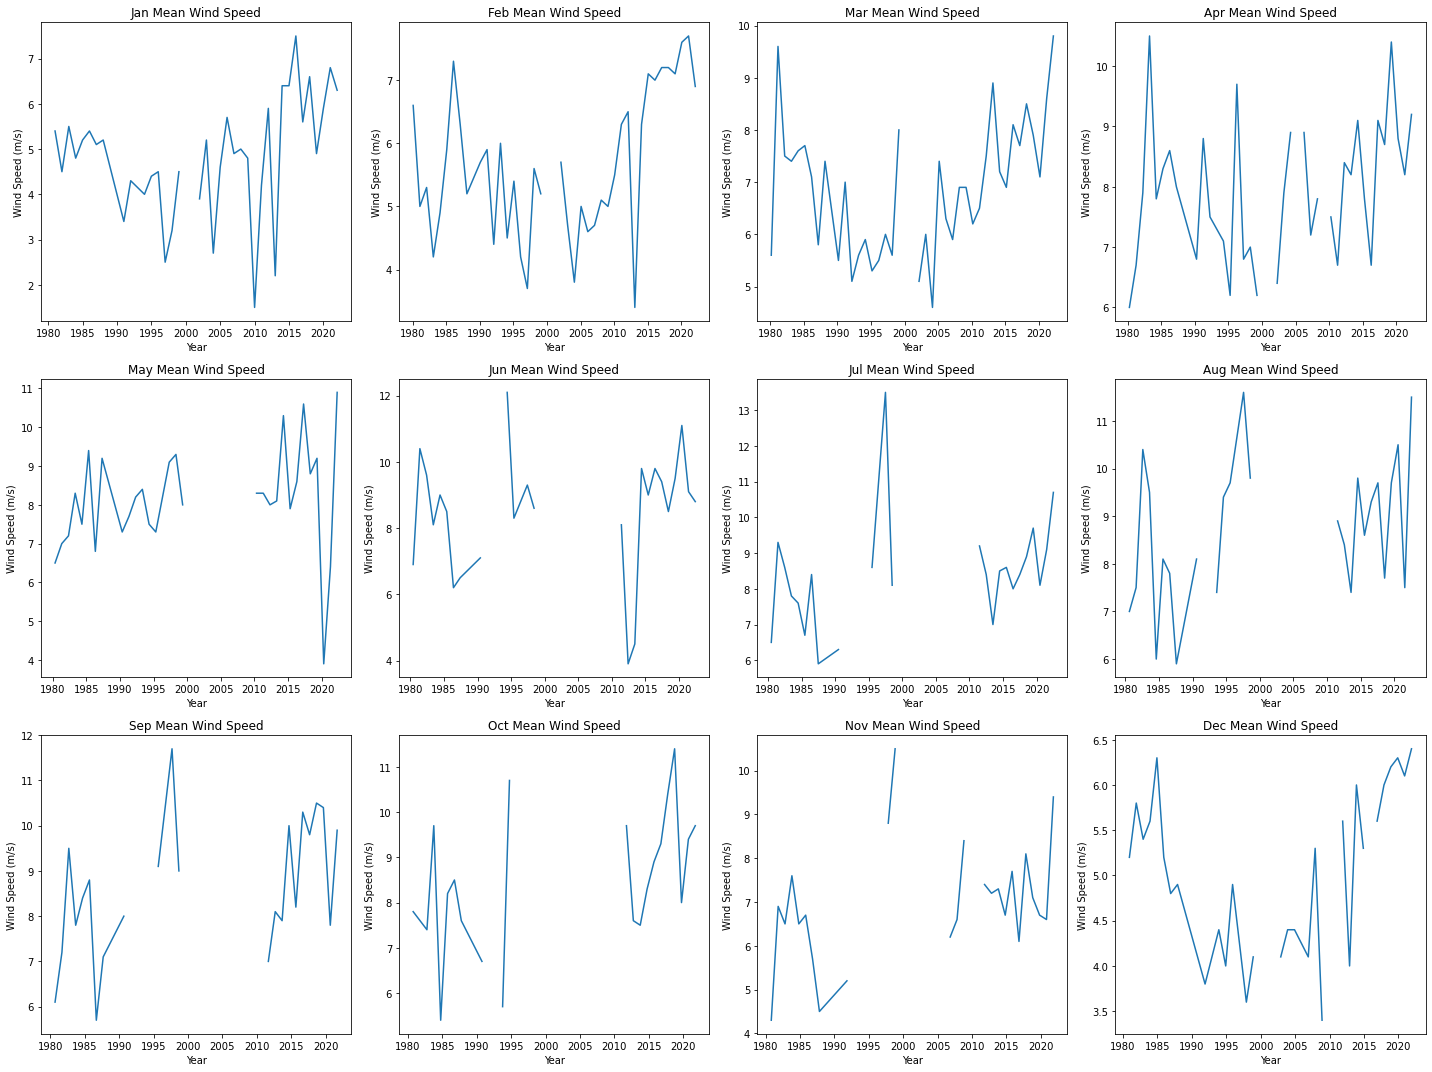

In [64]:
#Create a for loop that will perform the above expanded graphing procedure 
fig, ax2 = plt.subplots(3, 4, figsize = (20,15))
axs = ax2.flatten()
fig.set_facecolor('white')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = 0
y = 0

for month in months:
    wind_mean = byrd.loc[byrd['month'] == month]
    # wtf.reset_index(inplace = True, drop = True)
    # wtf['datetime'] = pd.to_datetime(wtf['datetime']).dt.year
    # print(wtf['datetime'])
    ax2[x,y].plot(wind_mean['mean wind speed (m/s)'])
    ax2[x,y].set_title(month + ' Mean Wind Speed')
    ax2[x,y].set_xlabel('Year')
    ax2[x,y].set_ylabel('Wind Speed (m/s)')
    # ax1[x,y].set_xticklabels(ax1[x,y].get_xlabel(), rotation = 45)
    # ax1[x,y].set_xticklabels(wtf['datetime'], rotation = 45)
    # print(wtf)
    
    
    y = y + 1
    if y == 4:
        x = x + 1
        y = 0
        
plt.tight_layout()
fig.savefig('byrd_mean_wind.png')

In [43]:
#Convert mean wind speed to float type 
byrd['mean air pressure (mb)'] = byrd['mean air pressure (mb)'].astype('float')

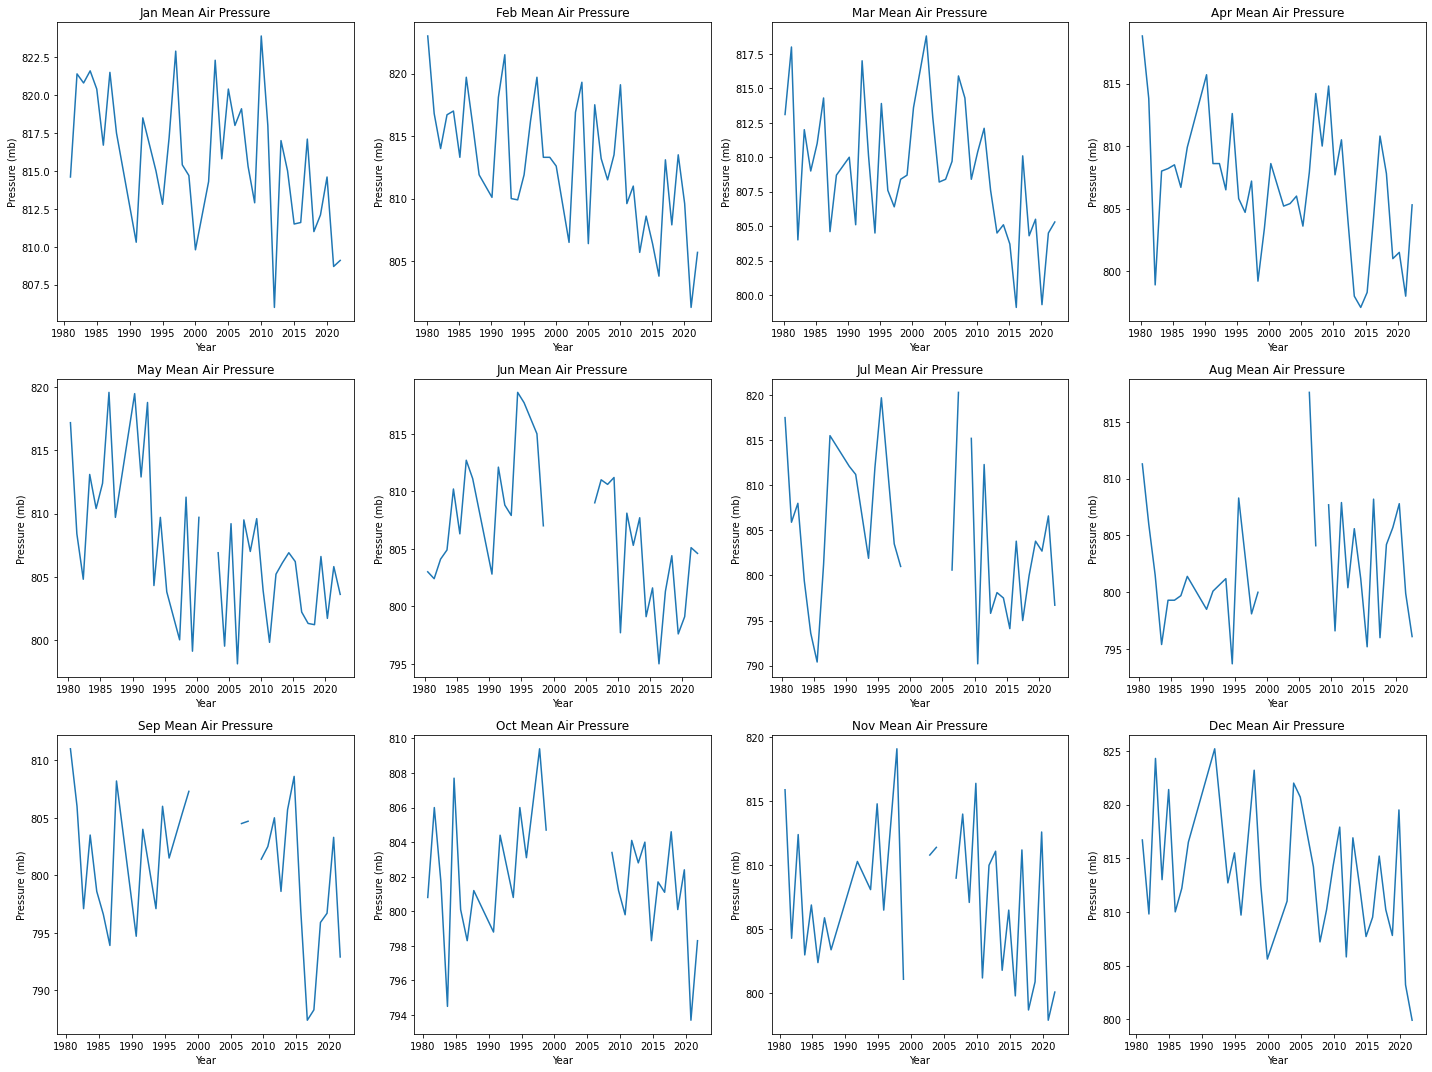

In [65]:
#Create a for loop that will perform the above expanded graphing procedure 
fig, ax3 = plt.subplots(3, 4, figsize = (20,15))
axs = ax3.flatten()
fig.set_facecolor('white')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = 0
y = 0

for month in months:
    p_mean = byrd.loc[byrd['month'] == month]
    # wtf.reset_index(inplace = True, drop = True)
    # wtf['datetime'] = pd.to_datetime(wtf['datetime']).dt.year
    # print(wtf['datetime'])
    ax3[x,y].plot(p_mean['mean air pressure (mb)'])
    ax3[x,y].set_title(month + ' Mean Air Pressure')
    ax3[x,y].set_xlabel('Year')
    ax3[x,y].set_ylabel('Pressure (mb)')
    # ax1[x,y].set_xticklabels(ax1[x,y].get_xlabel(), rotation = 45)
    # ax1[x,y].set_xticklabels(wtf['datetime'], rotation = 45)
    # print(wtf)
    
    
    y = y + 1
    if y == 4:
        x = x + 1
        y = 0
        
plt.tight_layout()
fig.savefig('byrd_mean_pressure.png')

In [50]:
byrd2 = byrd[['max air temp', 'min air temp', 'max wind vv', 'max air pressure', 'min air pressure']]
byrd2.to_csv('Byrd_max_min_values.csv')